# Dataset Description

The dataset, 
[**Students: Germany, semester, nationality, sex, subject**](https://www-genesis.destatis.de/genesis//online?operation=table&code=21311-0003&bypass=true&levelindex=1&levelid=1714001036017#abreadcrumb), presented in this notebook provides a comprehensive overview of student statistics in Germany, detailing the number of students by semester, nationality, sex, and subject. 

## Key Features

- **Student Demographics**: The data includes a breakdown of students by gender, with separate counts for male and female students across various subjects.
- **Subject Diversity**: The dataset covers a wide range of 293 subjects, from areas like Waste Management and Egyptology to more conventional fields such as Agricultural Science and American Studies etc. and reflects the diverse academic interests pursued in Germany.
- **Semester-wise Distribution**: The statistics are organized by semester (WT 2022/23, WT 2021/22, WT 2020/21), offering insights into the enrollment trends over time.
- **Detailed Breakdown**: Each subject is listed with the total number of students, as well as the distribution between male and female students, providing a clear picture of gender representation in each academic field.

This dataset serves as a valuable resource for analyzing educational trends and gender distribution across different fields of study in Germany. It can be utilized for academic research, policy-making, and understanding the dynamics of higher education in the country.


### Importing necessary libraries and loading the dataset

In [140]:
# Necessary Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error

In [141]:
# Load the data
df = pd.read_csv('data/21311-0003_$F.csv', sep=';', encoding='ISO-8859-1', skiprows=7,names=['semester', 'subject_code', 'subject_name', 'german_male', 'german_female', 'german_total', 'foreigner_male', 'foreigner_female', 'foreigner_total','male', 'female', 'total'])

### Data Cleaning

In [156]:
df = df.replace('-', '0')
df = df.fillna('0')
df = df.iloc[:-3]

In [157]:
df.head()

,semester,subject_code,subject_name,german_male,german_female,german_total,foreigner_male,foreigner_female,foreigner_total,male,female,total
0,WT 2020/21,SF141,Waste Management,53,26,79,2,0,2,55,26,81
1,WT 2020/21,SF002,African Studies,357,631,988,141,190,331,498,821,1319
2,WT 2020/21,SF138,Agricultural Biology,373,398,771,282,234,516,655,632,1287
3,WT 2020/21,SF125,Agricultural Economics,792,539,1331,359,240,599,1151,779,1930
4,WT 2020/21,SF003,Agricultural Science/Agriculture,7432,6966,14398,1143,1047,2190,8575,8013,16588


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   semester          879 non-null    object
 1   subject_code      879 non-null    object
 2   subject_name      879 non-null    object
 3   german_male       879 non-null    object
 4   german_female     879 non-null    object
 5   german_total      879 non-null    object
 6   foreigner_male    879 non-null    object
 7   foreigner_female  879 non-null    object
 8   foreigner_total   879 non-null    object
 9   male              879 non-null    object
 10  female            879 non-null    object
 11  total             879 non-null    object
dtypes: object(12)
memory usage: 82.5+ KB


## 1. What are the trends in student enrollment across various fields of study?

In [144]:
# Trends in enrollment across fields
enroll_trends = df.groupby(['semester', 'subject_name'])[['german_total', 'foreigner_total']].sum().reset_index()
enroll_trends['total'] = enroll_trends['german_total'] + enroll_trends['foreigner_total']
enroll_trends = enroll_trends[['semester', 'subject_name', 'total']].sort_values(['semester', 'subject_name'])

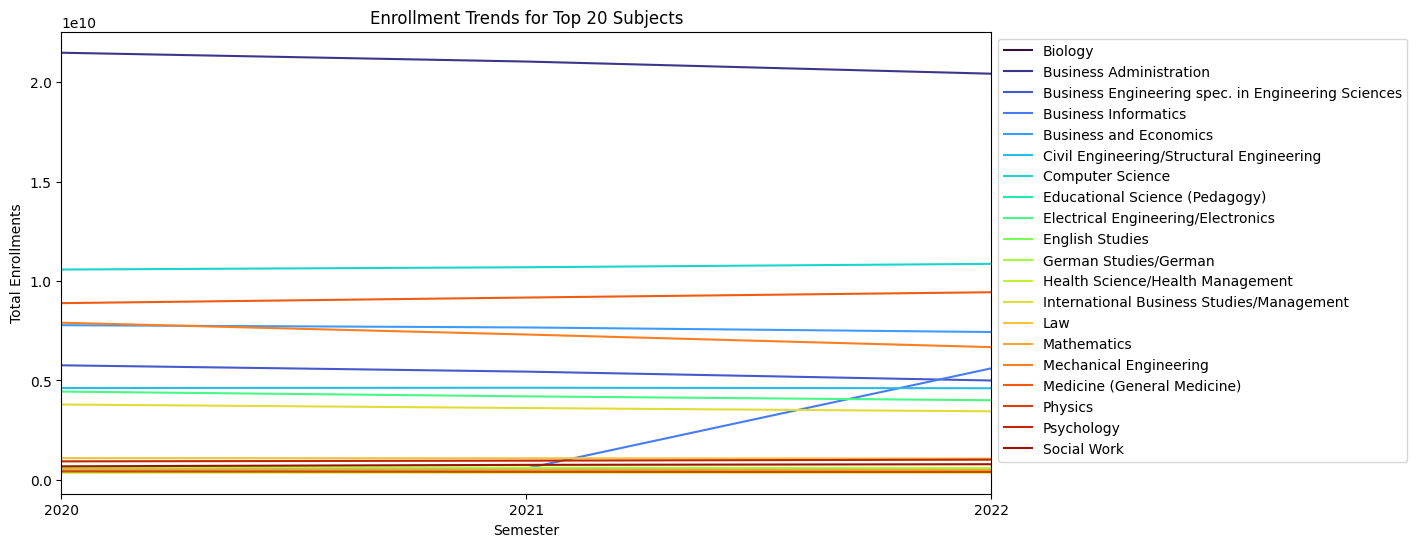

In [145]:
# Extract year and term from semester column
enroll_trends['year'] = enroll_trends['semester'].str.extract(r'(\d{4})', expand=False)
# Combine year and term into a new datetime column
enroll_trends['semester'] = pd.to_datetime(enroll_trends['year'], format='%Y')

# Convert 'total' column to numeric
enroll_trends['total'] = pd.to_numeric(enroll_trends['total'], errors='coerce')

# Get the top 20 subjects by total enrollments
top_subjects = enroll_trends.groupby('subject_name')['total'].sum().sort_values(ascending=False).head(20).index

# Filter the dataframe to include only the top 10 subjects
top_trends = enroll_trends[enroll_trends['subject_name'].isin(top_subjects)]

# Create a line plot for each of the top 20 subjects
fig, ax = plt.subplots(figsize=(12, 6))

# Define the colormap
cmap = matplotlib.colormaps['turbo']  

# Get the number of subjects
num_subjects = len(top_trends['subject_name'].unique())

for i, (subject, group) in enumerate(top_trends.groupby('subject_name')):
    color = cmap(i / num_subjects)  # Get the color from the colormap
    group.set_index('semester')['total'].plot(ax=ax, label=subject, color=color)

ax.set_xlabel('Semester')
ax.set_ylabel('Total Enrollments')
ax.set_title('Enrollment Trends for Top 20 Subjects')

# Place the legend outside of the plot on the right side
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## 2. How does gender distribution vary across different fields of study?

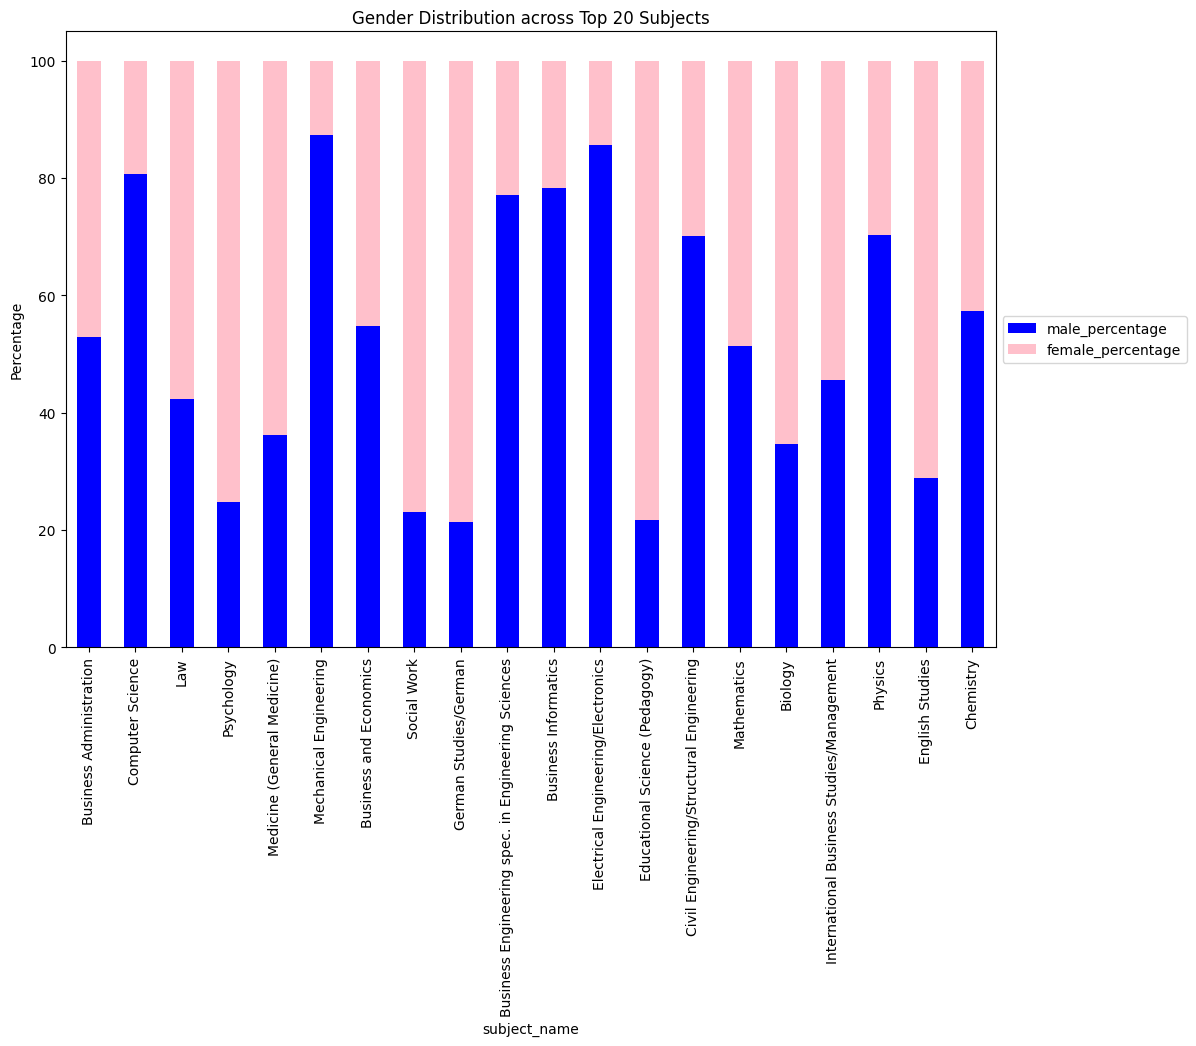

In [146]:

df['male'] = df['male'].astype(int)
df['female'] = df['female'].astype(int)
df['total'] = df['total'].astype(int)

# Group by 'subject_name'
grouped = df.groupby('subject_name').sum()

# Calculate percentage male/female for each subject
grouped['male_percentage'] = grouped['male'] / grouped['total'] * 100
grouped['female_percentage'] = grouped['female'] / grouped['total'] * 100

# Sort the grouped data by 'total' in descending order and take the top 20
top_10_subjects = grouped.sort_values(by='total', ascending=False).head(20)

# Visualize with a bar chart for the top 20 subjects
ax = top_10_subjects[['male_percentage', 'female_percentage']].plot(kind='bar', stacked=True, figsize=(12, 8), color=['blue', 'pink'])
plt.ylabel('Percentage')
plt.title('Gender Distribution across Top 20 Subjects')

# Place legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


## 3. Show the distribution of students across top 10 subjects

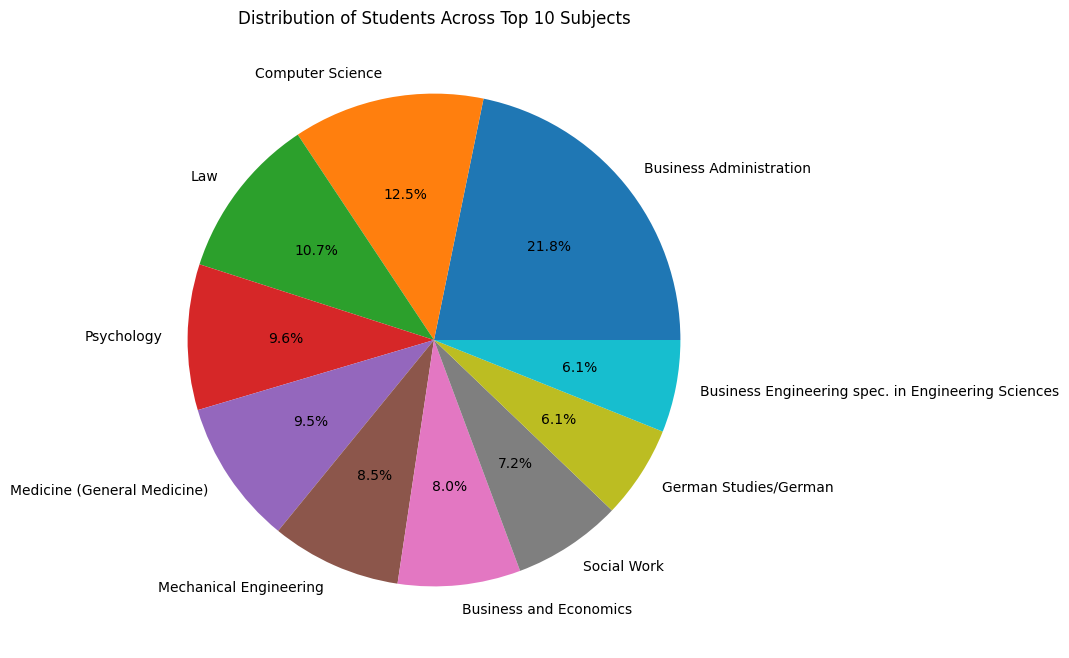

In [147]:

# Group by 'subject_name' and sum 'total'
grouped = df.groupby('subject_name')['total'].sum()


# Sort the grouped data in descending order
sorted_grouped = grouped.sort_values(ascending=False)

# Take the top 10 subjects
top_10_subjects = sorted_grouped.head(10)

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_subjects, labels=top_10_subjects.index, autopct='%1.1f%%')
plt.title('Distribution of Students Across Top 10 Subjects')
plt.show()



## 4. Which subject is most popular among international students?

In [148]:
# Convert 'foreigner_total' to integer
df['foreigner_total'] = df['foreigner_total'].astype(int)

# Group by 'subject_name' and sum 'foreigner_total'
grouped = df.groupby('subject_name')['foreigner_total'].sum()

# Find the subject with the maximum 'foreigner_total'
most_popular_subject = grouped.idxmax()

print(f"The most popular subject for international students is: {most_popular_subject}")

The most popular subject for international students is: Computer Science


## 5. Which subjects are most popular among male versus female students?

In [149]:
# Group by 'subject_name' and sum 'male' and 'female'
grouped = df.groupby('subject_name').agg({'male': 'sum', 'female': 'sum'})

# Sort by 'male' and 'female' and get top 10
top_male_subjects = grouped['male'].sort_values(ascending=False).head(10)
top_female_subjects = grouped['female'].sort_values(ascending=False).head(10)

>#### Top 10 subjects for male students:

In [150]:
top_male_subjects_df = top_male_subjects.to_frame()
display(top_male_subjects_df)

,male
subject_name,
Business Administration,381421
Computer Science,335771
Mechanical Engineering,247008
Electrical Engineering/Electronics,165603
Business Informatics,156789
Business Engineering spec. in Engineering Sciences,154811
Law,149964
Business and Economics,146236
Civil Engineering/Structural Engineering,121697


>#### Top 10 subjects for female students:

In [151]:
top_female_subjects_df = top_female_subjects.to_frame()
display(top_female_subjects_df)

,female
subject_name,
Business Administration,340026
Psychology,238458
Law,204689
Medicine (General Medicine),201007
Social Work,182426
German Studies/German,158854
Educational Science (Pedagogy),144155
Business and Economics,120396
Biology,109388


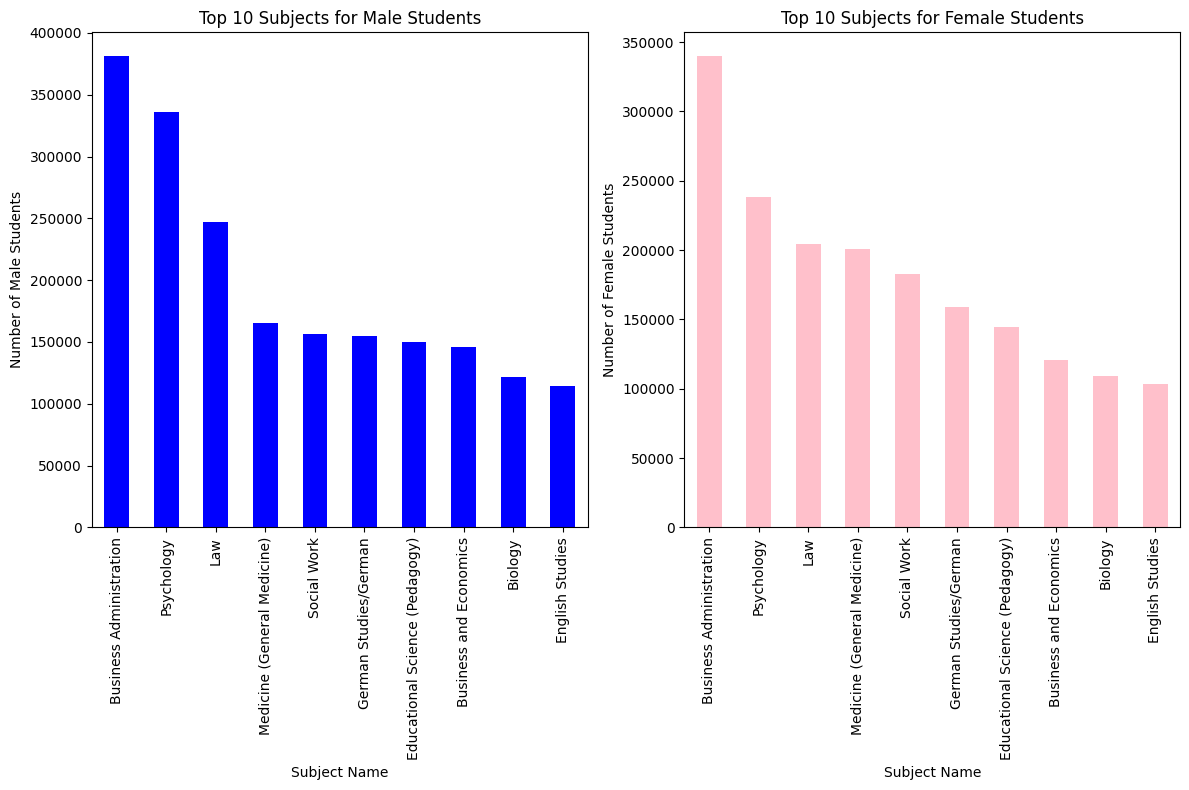

In [152]:
# Create plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharex=True)

top_male_subjects.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Top 10 Subjects for Male Students')
axes[0].set_ylabel('Number of Male Students')
axes[0].set_xlabel('Subject Name')

top_female_subjects.plot(kind='bar', ax=axes[1], color='pink')
axes[1].set_title('Top 10 Subjects for Female Students')
axes[1].set_ylabel('Number of Female Students')
axes[1].set_xlabel('Subject Name')

plt.tight_layout()
plt.show()

## 6. Can we predict future enrollments based on previous semester data?

In [153]:
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split

# Create separate DataFrames for each semester
df_2020_21 = df[df['semester'] == 'WT 2020/21']
df_2021_22 = df[df['semester'] == 'WT 2021/22']
df_2022_23 = df[df['semester'] == 'WT 2022/23']

In [154]:
# Make a DataFrame of predictor variables
predictors = pd.DataFrame({
    "WT 2020/21": df_2020_21['total'].values, 
    "WT 2021/22": df_2021_22['total'].values
})

# Initialize model
model = linear_model.LinearRegression()

# Train the model using the previous CPI data
model.fit(X = predictors, y = df_2022_23['total'])

print("Model intercept: ", model.intercept_)
print("Model Coefficients: ", model.coef_)

preds = model.predict(X=predictors)
print("RMSE: ", np.sqrt(mean_squared_error(df_2022_23['total'], preds)))


Model intercept:  -11.970470674374155
Model Coefficients:  [-0.76767663  1.7620909 ]
RMSE:  449.78921439304565


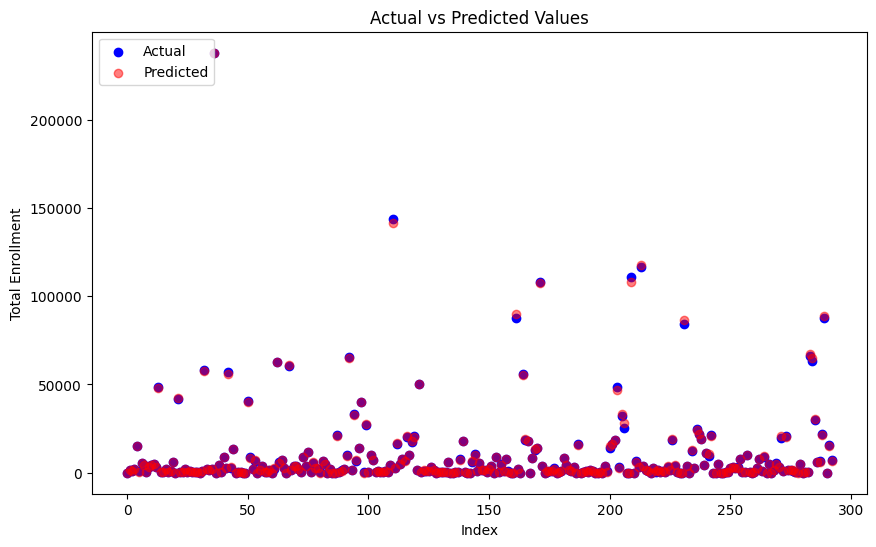

In [155]:
# Create a range of index values
index = range(0, len(df_2022_23['total']))

plt.figure(figsize=(10, 6))

# Scatter plot of actual values
plt.scatter(index, df_2022_23['total'], color='b', label='Actual')

# Scatter plot of predicted values
plt.scatter(index, preds, color='r', alpha= 0.5, label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Total Enrollment')
plt.legend(loc='upper left')
plt.show()